<a href="https://colab.research.google.com/github/BautiSobenko/IA-2022/blob/main/HCM_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = np.random.random((8,2))
df

array([[0.61261286, 0.45730865],
       [0.32919197, 0.08392557],
       [0.55132763, 0.13578652],
       [0.22911456, 0.30463602],
       [0.26554951, 0.92111692],
       [0.12914173, 0.6938479 ],
       [0.77451393, 0.01042592],
       [0.437217  , 0.08420551]])

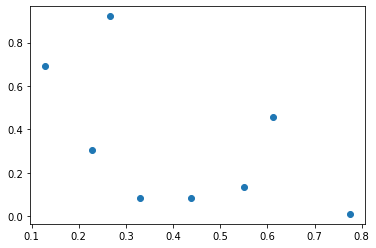

In [ ]:
plt.scatter(df[:,0],df[:,1]); #Grafico de datos en plano bidimensional

In [ ]:
k = 2 # K selection

**Seleccion de Centros random**

In [ ]:
#Creo nuevo array con los centros de cluster dados por el index random
centrosCluster = np.random.random((2,2))
centrosCluster

array([[0.65878426, 0.57318676],
       [0.40365371, 0.78781613]])

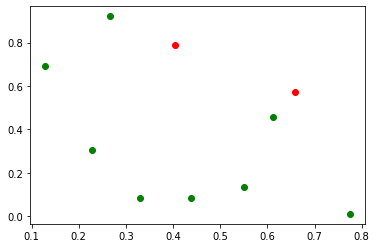

In [ ]:
plt.scatter(df[:,0],df[:,1], c="green" ); #Grafico de datos en plano bidimensional
plt.scatter(centrosCluster[:,0],centrosCluster[:,1],c="red");

In [ ]:
cantDatos = df.shape[0]
M = np.zeros( (k, cantDatos) )

In [ ]:
def dist_euclidea_arr(df,x2):
    """
        arr.shape = (n_datos, n_dim)
        x2.shape = (n_dim,)
    """
    dista = []
    for i in range(df.shape[0]):
        dista.append(np.sqrt(np.sum((df[i]-x2)**2)))
    return np.array(dista)

In [ ]:
distClusters = np.array(dist_euclidea_arr( df, centrosCluster[0]))
distClusters = np.append(distClusters, dist_euclidea_arr( df, centrosCluster[1]))
distClusters = distClusters.reshape(2,8)
distClusters

array([[0.12473785, 0.58992167, 0.45040636, 0.50669078, 0.52506091,
        0.54321296, 0.57453731, 0.53683769],
       [0.39102317, 0.7078181 , 0.66854334, 0.51373819, 0.19194236,
        0.29014971, 0.86132041, 0.70441068]])

In [ ]:
#Matriz de pertenencia a clusters
for i in range(cantDatos):
  idx = np.argmax(distClusters[:,i], axis=0)
  M[idx,i] = 1
M = M.astype(int)
M

array([[0, 0, 0, 0, 1, 1, 0, 0],
       [1, 1, 1, 1, 0, 0, 1, 1]])

In [ ]:
cluster1 = []
cluster2 = []

for i in range(cantDatos):
  if (M[0,i] == 1):
    cluster1.append(df[i,:])
  else:
    cluster2.append(df[i,:])

cluster1 = np.array(cluster1)
cluster2 = np.array(cluster2)


In [ ]:
cluster2

array([[0.61261286, 0.45730865],
       [0.32919197, 0.08392557],
       [0.55132763, 0.13578652],
       [0.22911456, 0.30463602],
       [0.77451393, 0.01042592],
       [0.437217  , 0.08420551]])

In [ ]:
cluster1

array([[0.26554951, 0.92111692],
       [0.12914173, 0.6938479 ]])

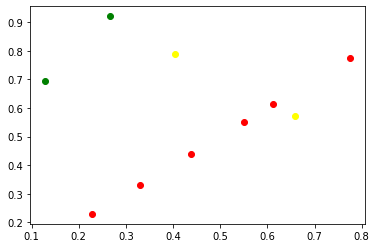

In [ ]:
#Grafico de datos en plano bidimensional
plt.scatter( cluster1[:,0] , cluster1[:,1], c="green");
plt.scatter( cluster2[:,0] , cluster2[:,0], c="red");
plt.scatter(centrosCluster[:,0],centrosCluster[:,1],c="yellow");

In [ ]:
#Actualizacion de centros de cluster

actCentroCluster1 = np.array( [cluster1[:,0].mean(), cluster1[:,1].mean()] )
actCentroCluster1

array([0.19734562, 0.80748241])

In [ ]:
actCentroCluster2 = np.array( [cluster2[:,0].mean(), cluster2[:,1].mean()] )
actCentroCluster2

array([0.48899633, 0.17938137])

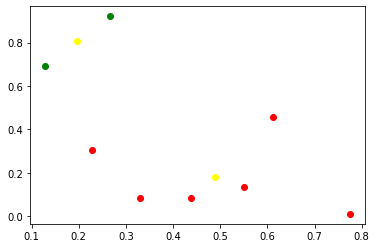

In [ ]:
plt.scatter( cluster1[:,0] , cluster1[:,1] , c="green" ); #Grafico de datos en plano bidimensional
plt.scatter( cluster2[:,0] , cluster2[:,1] , c="red" );
plt.scatter( actCentroCluster1[0], actCentroCluster1[1], c="yellow" )
plt.scatter( actCentroCluster2[0], actCentroCluster2[1], c="yellow" )